# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)

%matplotlib inline

np.random.seed(0)

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

## Nicholas O'Brien
worked with Eric Teunissen and Lucas Peterson

## Problem 2

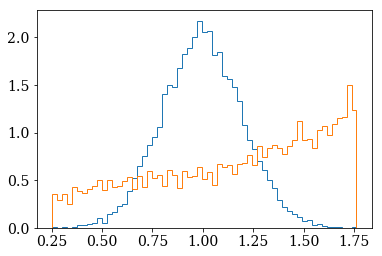

In [2]:
N     = 10000
mu    = 1.0
sigma = 0.2

#data  = np.random.normal(loc=mu,scale=sigma,size=N)
#data = norm(mu,sigma).rvs(N)
data = norm.rvs(loc = mu,scale = sigma, size = N)

q25,q75 = np.percentile(data,[25,75])
sigmaG  = 0.7413 * (q75-q25)
binsize = 2.7*sigmaG / (N**(1./3.))
bins    = np.append(np.arange(start=np.min(np.sort(data)),stop=np.max(np.sort(data)),
                              step=binsize),np.max(np.sort(data)))

true = norm(mu,sigma).pdf(data)


plt.hist(data,bins=bins,histtype = 'step',density = True)
plt.hist(true,bins=bins,histtype = 'step',density = True)
print()



## Problem 3

Freedman Binsize = 0.05005272385425116


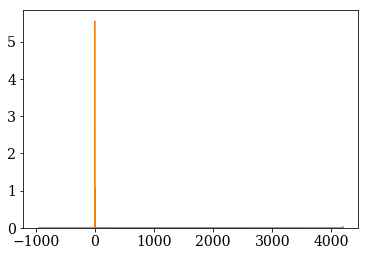

In [3]:
mu2 = 2.0
gamma = 0.5

dataCauchy = cauchy.rvs(loc = mu2,scale = gamma, size = N)
data3 = np.concatenate((data,dataCauchy))

q25,q75 = np.percentile(data3,[25,75])
sigmaG  = 0.7413 * (q75-q25)

binsizeFreed = 2.7*sigmaG / (2*N**(1./3.))
binsFreed    = np.append(np.arange(start=np.min(np.sort(data3)),stop=np.max(np.sort(data3)),
                              step=binsizeFreed),np.max(np.sort(data3)))

binsizeScott = 3.5 * gamma / (2*N**(1./3.))
binsScott    = np.append(np.arange(start=np.min(np.sort(data3)),stop=np.max(np.sort(data3)),
                              step=binsizeScott),np.max(np.sort(data3)))


truecauchy = cauchy(mu2,gamma).pdf(data3)

plt.hist(data3,bins=binsFreed,histtype = 'step',density = True)
plt.hist(truecauchy,bins=binsFreed,histtype = 'step',density = True)
print("Freedman Binsize = " + str(binsizeFreed))


Scott Binsize = 0.040613902294111826



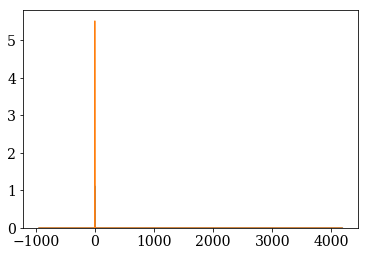

In [4]:
plt.hist(data3,bins=binsScott,histtype = 'step',density = True)
plt.hist(truecauchy,bins=binsScott,histtype = 'step',density = True)
print("Scott Binsize = " + str(binsizeScott))
print()

## Problem 4

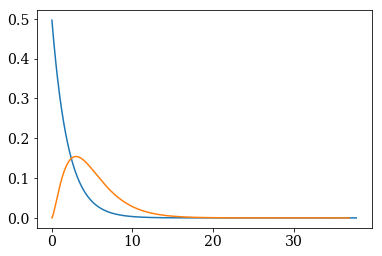

In [93]:
from scipy.stats import chi2

data4 = norm.rvs(loc = 0,scale = 1,size = 1000000)


dist5 = chi2(5)
r5 = dist.rvs(1000000)
dist2 = chi2(2)
r2 = dist.rvs(1000000)

plt.plot(np.sort(r2),dist2.pdf(np.sort(r2)))
plt.plot(np.sort(r5),dist5.pdf(np.sort(r5)))


#plt.hist(data4,bins=100,histtype="step",density=True)